In [3]:
!pip install finance-datareader 
!pip install pandas-datareader

import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt



In [39]:
import datetime

In [41]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023,12,31)

In [42]:

df = fdr.DataReader('000660' , start , end)

n = 20  # 밴드 기간
df['MA'] = df['Close'].rolling(n).mean()  # 이동평균선
df['UBB'] = df['MA'] + 2 * df['Close'].rolling(n).std()  # 상단 밴드
df['LBB'] = df['MA'] - 2 * df['Close'].rolling(n).std()


# 돌파매매 조건 체크
buy_signal = []
for i in range(n, len(df)):
    # Close 가격이 볼린저 밴드 하단 에 닿음
    if df['Close'].iloc[i-1] <= df['LBB'].iloc[i-1]*1.0:
        # Close 가격이 볼린저 밴드 80% 상단까지 상승
        if df['Close'].iloc[i] >= df['UBB'].iloc[i]*0.9:
            # Close 가격이 볼린저 밴드 중단까지 하락
            for j in range(i+1, len(df)):
                if df['Close'].iloc[j] <= df['MA'].iloc[j]:
                    # Close 가격이 다시 상승할 때 매수 신호
                    for k in range(j+1, len(df)):
                        if df['Close'].iloc[k] > df['Close'].iloc[k-1]:
                            buy_signal.append(df.index[k])
                            break
                    break

df['Buy Signal'] = 0
df.loc[df.index.isin(buy_signal), 'Buy Signal'] = 1

df[df['Buy Signal']==1]

,Open,High,Low,Close,Volume,Change,MA,UBB,LBB,Buy Signal
Date,,,,,,,,,,
2023-07-14,115500,120200,115300,118000,5817889,0.034181,114740.0,118725.447211,110754.552789,1
2023-12-08,128100,129100,127500,127500,2762531,0.015127,130280.0,135368.935366,125191.064634,1
2023-12-11,128700,129100,127300,128900,3696790,0.010980,130135.0,135206.810639,125063.189361,1


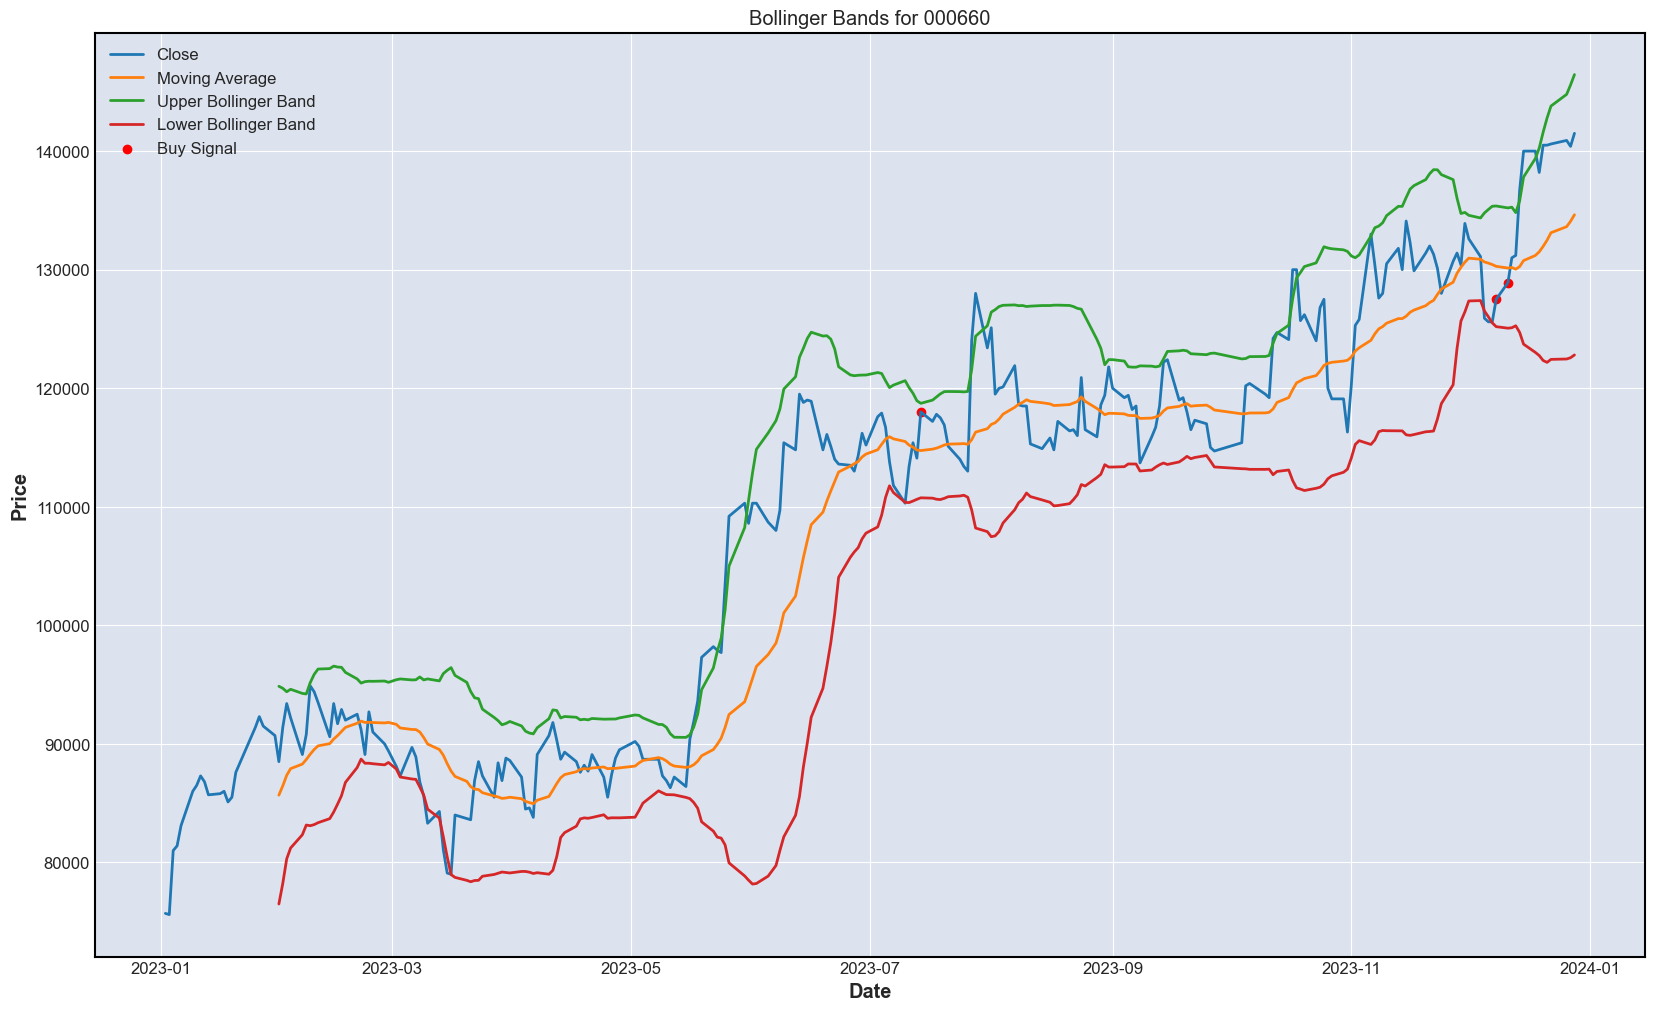

In [66]:
plt.figure(figsize=(20, 12))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['MA'], label='Moving Average')
plt.plot(df.index, df['UBB'], label='Upper Bollinger Band')
plt.plot(df.index, df['LBB'], label='Lower Bollinger Band')
buy_signal_dates = df.loc[df['Buy Signal'] == 1].index
buy_signal_prices = df.loc[df['Buy Signal'] == 1, 'Close']
plt.scatter(buy_signal_dates, buy_signal_prices, color='r', marker='o', label='Buy Signal')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands for 000660')
plt.show()